# Assignment 8: Moving Beyond Linearity

Dataset(s) needed:
Wage data frame of the ISLR library SF-DAT-21 (https://github.com/ga-students/sf-dat-21/tree/master/unit-projects/dataset)

Libraries needed:
stats
gam

Using the wage data, find polynomial fit for wage depending on age. Select the best value for the degree.


'data.frame':	3000 obs. of  11 variables:
 $ year      : int  2006 2004 2003 2003 2005 2008 2009 2008 2006 2004 ...
 $ age       : int  18 24 45 43 50 54 44 30 41 52 ...
 $ maritl    : Factor w/ 5 levels "1. Never Married",..: 1 1 2 2 4 2 2 1 1 2 ...
 $ race      : Factor w/ 4 levels "1. White","2. Black",..: 1 1 1 3 1 1 4 3 2 1 ...
 $ education : Factor w/ 5 levels "1. < HS Grad",..: 1 4 3 4 2 4 3 3 3 2 ...
 $ region    : Factor w/ 9 levels "1. New England",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ jobclass  : Factor w/ 2 levels "1. Industrial",..: 1 2 1 2 2 2 1 2 2 2 ...
 $ health    : Factor w/ 2 levels "1. <=Good","2. >=Very Good": 1 2 1 2 1 2 2 1 2 2 ...
 $ health_ins: Factor w/ 2 levels "1. Yes","2. No": 2 2 1 1 1 1 1 1 1 1 ...
 $ logwage   : num  4.32 4.26 4.88 5.04 4.32 ...
 $ wage      : num  75 70.5 131 154.7 75 ...



Call:
lm(formula = wage ~ poly(age, 9), data = wage.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-100.04  -24.11   -4.73   14.96  198.13 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.5034     0.8558 130.299  < 2e-16 ***
poly(age, 9)1  349.2352    39.2155   8.906  < 2e-16 ***
poly(age, 9)2 -407.8165    39.2155 -10.399  < 2e-16 ***
poly(age, 9)3  129.5292    39.2155   3.303 0.000973 ***
poly(age, 9)4  -63.9327    39.2155  -1.630 0.103191    
poly(age, 9)5  -17.7670    39.2155  -0.453 0.650553    
poly(age, 9)6   29.9251    39.2155   0.763 0.445493    
poly(age, 9)7   25.2937    39.2155   0.645 0.519003    
poly(age, 9)8    8.7804    39.2155   0.224 0.822855    
poly(age, 9)9  -49.0169    39.2155  -1.250 0.211463    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.22 on 2090 degrees of freedom
Multiple R-squared:  0.08886,	Adjusted R-squared:  0.08494 
F-statistic: 22.65 on 9 and 2

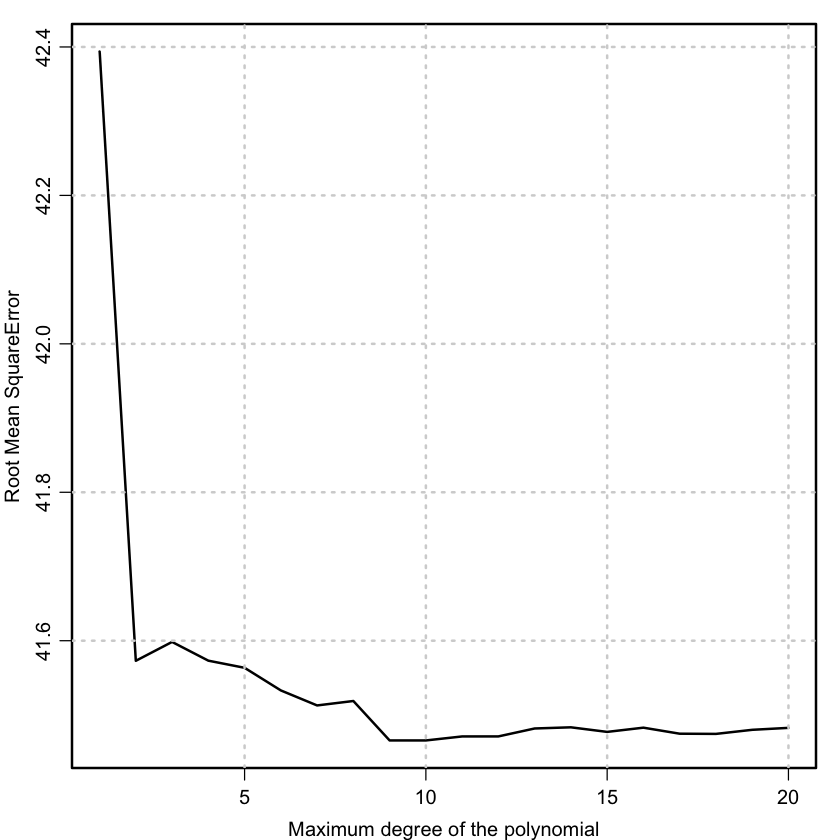

In [29]:
library("ISLR")
data(Wage)
str(Wage)
set.seed(123)
idx <- sample(nrow(Wage), size=as.integer(0.7*nrow(Wage)))
wage.train <- Wage[idx,]
wage.test <- Wage[-idx,]
rmse <- data.frame()
for(i in 1:20) {
  fit <- lm(wage~poly(age,i), data=wage.train)
  fit.pred <- predict(fit, wage.test)
  rmse <- rbind(rmse, 
                data.frame("i"=i,
                           "rmse"=sqrt(mean((wage.test$wage - fit.pred)**2))))
}
par(mar=c(3,3,1,1), mgp=c(2,0.7,0), lwd=2)
with(rmse, 
     plot(rmse~i,
          type="l",
          xlab="Maximum degree of the polynomial",
          ylab="Root Mean SquareError"))
grid()

# minumum RMSE at degree 9, so polynomial fit for wage~age: 
fit <- lm(wage~poly(age,9), data=wage.train)
summary(fit)

Using the wage data, construct a generalized additive model and compare to linear regression. 


In [30]:
library(gam)

#Here's some interesting stuff. I suppose we need to compare two models 
# on the same feature set (otherwise, it does not make sense). 
# If we train two models on features that has some non-linear 
# dependencies (age, year), we have following results: 
linFit <- lm(wage.train$wage~year
             +age,
             data = wage.train)
linFit.pred <-predict(linFit, wage.test)
linFit.rmse <- sqrt(mean((wage.test$wage - linFit.pred)**2))
linFit.rmse

gFit <- gam(wage ~ s(age, 9) + s(year, 4), data=Wage)
gFit.pred <- predict(gFit, wage.test)
gFit.rmse <- sqrt(mean((wage.test$wage - gFit.pred)**2))
gFit.rmse 

#as we can see, GAM behaves a bit better than linear




[1] 42.32379

[1] 41.27676

In [31]:
# At the same time, I've noticed, that if one trains 
# both models on almost every feature, linear model similar
# rmse. I think it happens as for all feature GAM almost looks like 
# linear model, and contrasting of factor variables has more importance,
linFit <- lm(wage.train$wage~year
             +age
             +maritl
             +race
             +education
             +jobclass
             +health
             +health_ins,
             data = wage.train)
linFit.pred <-predict(linFit, wage.test)
linFit.rmse <- sqrt(mean((wage.test$wage - linFit.pred)**2))
linFit.rmse

gFit <- gam(wage ~ s(age, 4) 
            + s(year, 4) 
            + education 
            +jobclass 
            + health 
            + maritl ,
            data=Wage)
gFit.pred <- predict(gFit, wage.test)
gFit.rmse <- sqrt(mean((wage.test$wage - gFit.pred)**2))
gFit.rmse 

[1] 36.2793

[1] 36.64497

Using the wage data, Create a smooth-spline model, having CV select the value of smoothing parameter and degrees of freedom.

[1] 6

[1] 0.02440861

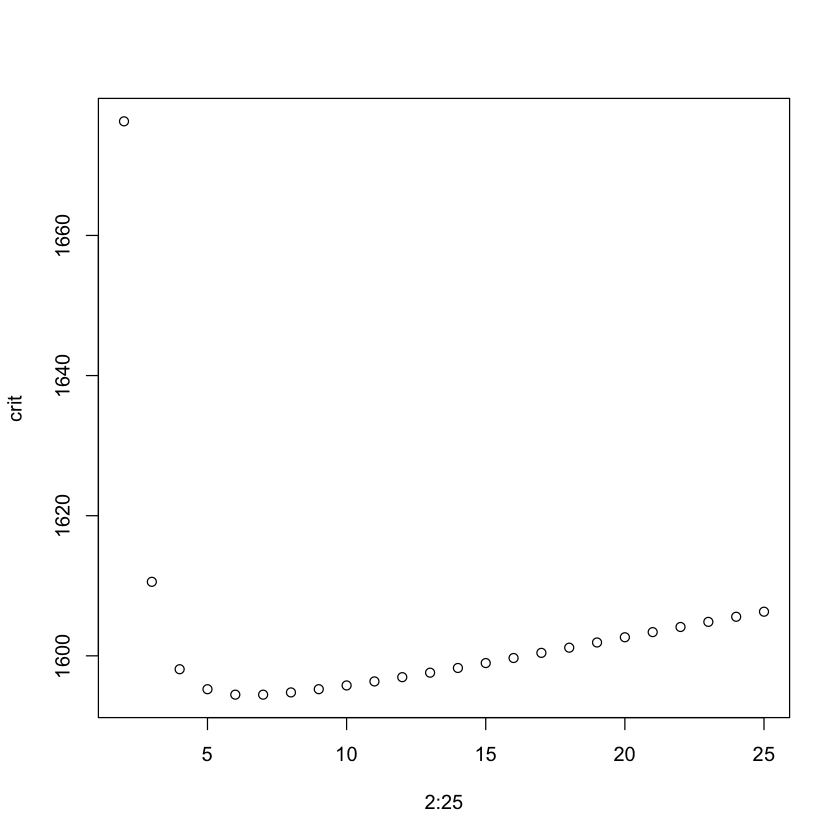

In [32]:
crit <- c()
lambda <- c()
for(i in 2:25) {
  fit <- with(Wage, smooth.spline(age, wage, df=i))
  crit <- c(crit, fit$cv.crit)
  lambda <- c(lambda, fit$lambda)
}

plot(2:25, crit)
which(crit == min(crit))
lambda[which(crit == min(crit))]

Using the admissions data, predict grad school acceptance using regression splines.

In [33]:
library(data.table)
library('mice')
options(warn=-1)
data <- fread('https://raw.githubusercontent.com/ga-students/sf-dat-21/master/unit-projects/dataset/admissions.csv')
mnames <- c('gre', 'gpa', 'prestige')
set.seed(12321)
dt <- as.data.table(data)
mice_mod <- mice(dt[,mnames,with=F], method='rf')
mice_output <- complete(mice_mod)
data$gre <- mice_output$gre
data$gpa <- mice_output$gpa
data$prestige <- mice_output$prestige
logic.splines <- gam(admit ~ s(gre, 4) 
                     + s(gpa, 4) 
                     + s(prestige, 4),
                     data=data,
                     family=binomial)


 iter imp variable
  1   1  gre  gpa  prestige
  1   2  gre  gpa  prestige
  1   3  gre  gpa  prestige
  1   4  gre  gpa  prestige
  1   5  gre  gpa  prestige
  2   1  gre  gpa  prestige
  2   2  gre  gpa  prestige
  2   3  gre  gpa  prestige
  2   4  gre  gpa  prestige
  2   5  gre  gpa  prestige
  3   1  gre  gpa  prestige
  3   2  gre  gpa  prestige
  3   3  gre  gpa  prestige
  3   4  gre  gpa  prestige
  3   5  gre  gpa  prestige
  4   1  gre  gpa  prestige
  4   2  gre  gpa  prestige
  4   3  gre  gpa  prestige
  4   4  gre  gpa  prestige
  4   5  gre  gpa  prestige
  5   1  gre  gpa  prestige
  5   2  gre  gpa  prestige
  5   3  gre  gpa  prestige
  5   4  gre  gpa  prestige
  5   5  gre  gpa  prestige


Using your admissions data model, what is the effect of going from 3.0 GPA to 4.0 GPA on the odds of admission?

In [34]:
gpa3 <- data.table(gre=0, gpa=3.0, prestige=0)
gpa4 <- data.table(gre=0, gpa=4.0, prestige=0)
predict(logic.splines, gpa4) - predict(logic.splines, gpa3)
# odds of addmission increases 0.69

1 
0.6969025